<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/BON4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
def load_csv(filepath):
    return pd.read_csv(filepath)
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Load dataset
# Replace 'Housing.csv' with your actual file path
df = pd.read_csv('Housing.csv')

# Print column names to verify
print("Column Names:", df.columns.tolist())

# Define target variable and features
# (Update column names if necessary to match your dataset)
target = "price"
features = ["area", "bedrooms",]

# Ensure features and target exist in the DataFrame
for col in features + [target]:
    if col not in df.columns:
        raise ValueError(f"Error: Column '{col}' not found in dataset.")

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for KNN and Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #This line defines X_train_scaled
X_test_scaled = scaler.transform(X_test) #This line defines X_test_scaled

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate performance
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression Metrics:")
print(f"MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}")


Column Names: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Linear Regression Metrics:
MAE: 1381158.90, MSE: 3280176595474.01, RMSE: 1811125.78


In [7]:
# Experimenting with different k values
k_values = [3, 5, 7]
knn_results = {}

for k in k_values:
    # Train KNN Regressor
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_knn = knn_model.predict(X_test_scaled)

    # Compute metrics
    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    mse_knn = mean_squared_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mse_knn)

    # Store results
    knn_results[k] = {"MAE": mae_knn, "MSE": mse_knn, "RMSE": rmse_knn}

    print(f"\nKNN Regression (k={k}):")
    print(f"MAE: {mae_knn:.2f}, MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}")



KNN Regression (k=3):
MAE: 1393717.13, MSE: 3551732970183.49, RMSE: 1884604.19

KNN Regression (k=5):
MAE: 1352425.69, MSE: 3381595282568.81, RMSE: 1838911.44

KNN Regression (k=7):
MAE: 1345651.38, MSE: 3370400798165.14, RMSE: 1835865.14


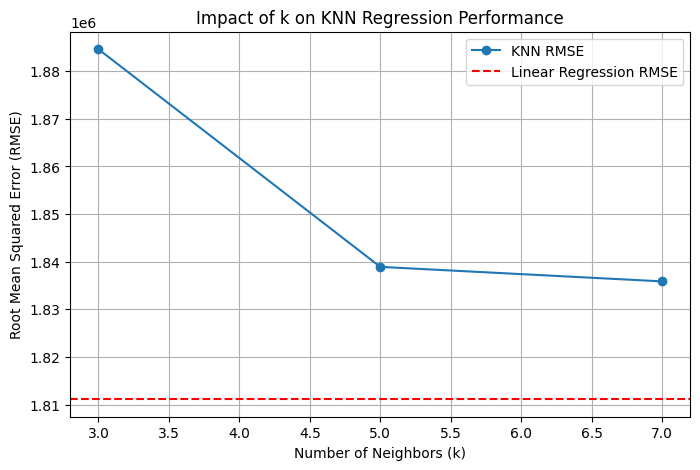

In [8]:
# Convert results to DataFrame
knn_df = pd.DataFrame(knn_results).T  # Transpose for easier plotting

# Plot k vs. RMSE
plt.figure(figsize=(8, 5))
plt.plot(knn_df.index, knn_df["RMSE"], marker="o", linestyle="-", label="KNN RMSE")
plt.axhline(y=rmse_lr, color="red", linestyle="--", label="Linear Regression RMSE")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Impact of k on KNN Regression Performance")
plt.legend()
plt.grid()
plt.show()
